In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
from sklearn import svm

In [4]:
digits = datasets.load_digits()

In [8]:
print(digits.data)
print(digits.target)
print(digits.images[0])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [33]:
clf = svm.SVC(gamma=0.1, C=100)

In [34]:
x, y = digits.data[:-10], digits.target[:-10]
clf.fit(x,y)

SVC(C=100, gamma=0.1)

Prediction: [3]


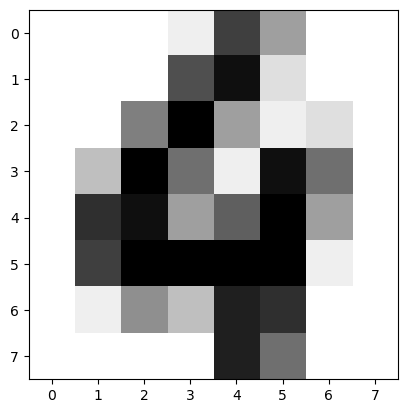

In [35]:
nbr = -9
sample_to_predict = digits.data[nbr].reshape(1, -1)

print('Prediction:', clf.predict(sample_to_predict))
plt.imshow(digits.images[nbr], cmap=plt.cm.gray_r, interpolation="nearest")

[1]
[0.1380943  0.24462418]


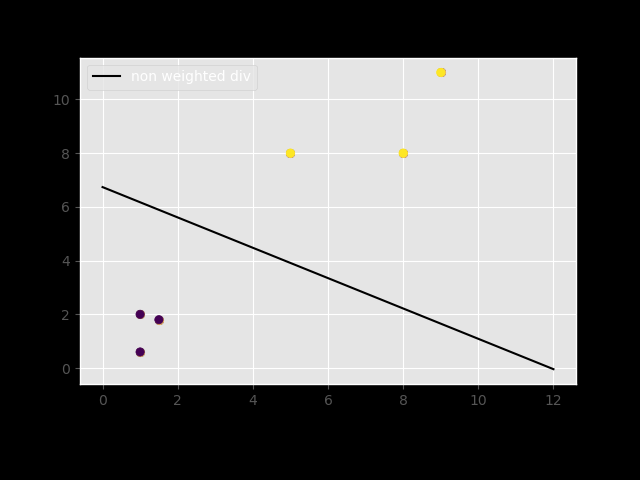

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib import style
style.use("ggplot")

x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

X = np.array([[1,2],
            [5,8],
            [1.5,1.8],
            [8,8],
            [1,0.6],
            [9,11]])

y = [0,1,0,1,0,1]

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X,y)

print(clf.predict([[10, 10]]))

w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a *  xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:,0], X[:, 1], c = y)
plt.legend()
plt.show()

In [3]:
import pandas as pd
import os
import time
from datetime import datetime
from time import mktime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use("dark_background")
import re

In [4]:
path = "C:/Users/riadb/Downloads/intraQuarter"

In [1]:
%matplotlib widget

def Key_Stats(gather="Total Debt/Equity (mrq)"):
    statspath = path + '/_KeyStats'
    stock_list = [x[0] for x  in os.walk(statspath)]
    # print(stock_list)
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'DE Ratio',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 'Status'
                                ]) #dataframe created b7al matrice or excel
    
    sp500_df = pd.read_csv("yahoo-index.csv") #sp500 is the performance of 500 best societe f marche usa

    ticker_list = [] #all charikat
    
    for each_dir in stock_list[1:50]: #all charikat stocks
        each_file = os.listdir(each_dir)
        
        ticker = each_dir.split("\\")[1] #we get smia ta3 charika
        ticker_list.append(ticker)  #we add it to the list
        
        starting_stock_value = False #stock ta3 had charika
        starting_sp500_value = False
        
        if len(each_file) > 0:
            for file in each_file: #all stocks ta3 charika
                
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html') #w9ita ta3 stock X
                unix_time = time.mktime(date_stamp.timetuple()) 
                
                full_file_path = each_dir + '/' + file #9raw stock X
                src = open(full_file_path, 'r')
                source = src.read()
                
                try:
                    try:
                        value = float(source.split(gather + ':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0]) #total debt/equity ta3 charika
                    except Exception as e:
                        value = float(source.split(gather + ':</td>\n<td class="yfnc_tabledata1">')[1].split('</td>')[0]) #total debt/equity ta3 charika
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d') #we make date mn unix time ta3 stock ta3 charika
                        row = sp500_df[(sp500_df.Date ==  sp500_date)] #ila kant hadik date f sp500 kan 7to data ta3ha here
                        sp500_value = float(row["Adj Close"].iloc[0])  #kan nakhdo value ta3 sp500 n7toha hna mn row
                    except Exception as ee:
                        sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%m-%d-%Y') #3days magic value 3600*24*3 to get out of weekend
                        row = sp500_df[(sp500_df.Date ==  sp500_date)]
                        sp500_value = float(row["Adj Close"].iloc[0])

                    try:
                        stock_price = float(source.split('</small><big><b>')[1].split('</b></big>')[0]) #actual stock price mn file ta3 charika X
                    except:
                        try:
                            stock_price = (source.split('</small><big><b>')[1].split('</b></big>')[0]) #actual stock price mn file ta3 charika X
                            stock_price = re.search(r'(\d{1,8}\.\d{1,8})', stock_price)
                            stock_price = float(stock_price.group(1))
                        except:
                            stock_price = (source.split('<span class="time_rtq_ticker">')[1].split('</span>'))
                            stock_price = re.search(r'(\d{1,8}\.\d{1,8})', stock_price)
                            stock_price = float(stock_price.group(1))
                        
                    if not starting_stock_value:
                        starting_stock_value = stock_price
                    if not starting_sp500_value:
                        starting_sp500_value = sp500_value
                        
                    stock_p_change = ((stock_price - starting_stock_value) / starting_stock_value) * 100
                    sp500_p_change = ((sp500_value - starting_sp500_value) / starting_sp500_value) * 100
                    difference = stock_p_change-sp500_p_change
                    # print(stock_price,' ',ticker)
                    if difference > 0: 
                        status = "outperform"
                    else:
                        status = "underperform"
                    
                    df = df._append({'Date':date_stamp, #date ta3 stock
                                     'Unix':unix_time,#time b unix
                                     'Ticker':ticker, #smia ta3 charika
                                     'DE Ratio':value, #debt/equity
                                     'Price':stock_price, #price ta3 stock in this day X
                                     'stock_p_change':stock_p_change, # chhal ta3 change mn lwl htal l stock ta3 db
                                     'SP500':sp500_value, #value ta3 sp500 equivalent to that day
                                     'sp500_p_change':sp500_p_change, # chhal ta3 change mn lwl htal l sp500 ta3 db
                                     'Difference':difference, # chhal ta3 difference between sp500 o stock f%
                                     'Status':status
                                    },ignore_index = True)
                except Exception as e:
                    pass
                src.close()

    for each_ticker in ticker_list: #all charikat
        try:
            plot_df = df[(df['Ticker'] == each_ticker)] #kan 9elbo 3la charika and their data
            plot_df = plot_df.set_index(['Date']) # time f plot

            if plot_df['Status'][-1] == "underperform":
                color = 'r'
            else:
                color = 'g'
            
            plot_df['Difference'].plot(label=each_ticker, color=color) #kan weriw difference between sp500 o stock lkola charika over time
            plt.legend()
        except:
            pass

    plt.show()
    save = gather.replace(' ','').replace(')','').replace('(','').replace('/','')+('.csv')
    # print(save)
    df.to_csv(save)

C:\Users\riadb\AppData\Local\Temp\ipykernel_23140\1346826714.py:82: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({'Date':date_stamp, #date ta3 stock
C:\Users\riadb\AppData\Local\Temp\ipykernel_23140\1346826714.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if plot_df['Status'][-1] == "underperform":
C:\Users\riadb\AppData\Local\Temp\ipykernel_23140\1346826714.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFram

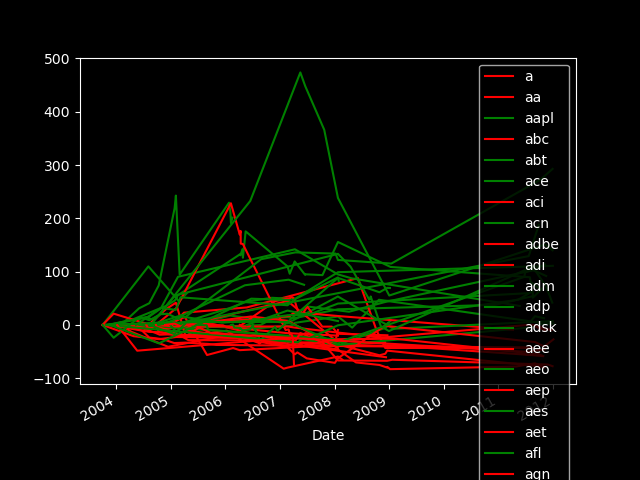

In [5]:
Key_Stats()

In [34]:
%matplotlib widget

def Key_Stats(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    statspath = path + '/_KeyStats'
    stock_list = [x[0] for x  in os.walk(statspath)]
    # print(stock_list)
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 ##############
                                 'DE Ratio',
                                 'Trailing P/E',
                                 'Price/Sales',
                                 'Price/Book',
                                 'Profit Margin',
                                 'Operating Margin',
                                 'Return on Assets',
                                 'Return on Equity',
                                 'Revenue Per Share',
                                 'Market Cap',
                                 'Enterprise Value',
                                 'Forward P/E',
                                 'PEG Ratio',
                                 'Enterprise Value/Revenue',
                                 'Enterprise Value/EBITDA',
                                 'Revenue',
                                 'Gross Profit',
                                 'EBITDA',
                                 'Net Income Avl to Common ',
                                 'Diluted EPS',
                                 'Earnings Growth',
                                 'Revenue Growth',
                                 'Total Cash',
                                 'Total Cash Per Share',
                                 'Total Debt',
                                 'Current Ratio',
                                 'Book Value Per Share',
                                 'Cash Flow',
                                 'Beta',
                                 'Held by Insiders',
                                 'Held by Institutions',
                                 'Shares Short (as of',
                                 'Short Ratio',
                                 'Short % of Float',
                                 'Shares Short (prior ',                                
                                 ##############
                                 'Status']) #dataframe created b7al matrice or excel
    
    sp500_df = pd.read_csv("yahoo-index.csv") #sp500 is the performance of 500 best societe f marche usa

    ticker_list = [] #all charikat
    
    for each_dir in stock_list[1:50]: #all charikat stocks
        each_file = os.listdir(each_dir)
        
        ticker = each_dir.split("\\")[1] #we get smia ta3 charika
        ticker_list.append(ticker)  #we add it to the list
        
        starting_stock_value = False #stock ta3 had charika
        starting_sp500_value = False
        
        if len(each_file) > 0:
            for file in each_file: #all stocks ta3 charika
                
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html') #w9ita ta3 stock X
                unix_time = time.mktime(date_stamp.timetuple()) 
                
                full_file_path = each_dir + '/' + file #9raw stock X
                src = open(full_file_path, 'r')
                source = src.read()
                
                try:
                    value_list = []

                    for each_data in gather:
                        try:
                            regex = re.escape(each_data) + r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                            value = re.search(regex, source)
                            value = (value.group(1))

                            if "B" in value:
                                value = float(value.replace("B",'')) * 1_000_000_000
                            elif "M" in value:
                                value = float(value.replace("M",'')) * 1_000_000
    
                            value_list.append(value)
                        
                        except Exception as e:
                            value = "N/A"
                            value_list.append(value)
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d') #we make date mn unix time ta3 stock ta3 charika
                        row = sp500_df[(sp500_df.Date ==  sp500_date)] #ila kant hadik date f sp500 kan 7to data ta3ha here
                        sp500_value = float(row["Adj Close"].iloc[0])  #kan nakhdo value ta3 sp500 n7toha hna mn row
                    except Exception as ee:
                        sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%m-%d-%Y') #3days magic value 3600*24*3 to get out of weekend
                        row = sp500_df[(sp500_df.Date ==  sp500_date)]
                        sp500_value = float(row["Adj Close"].iloc[0])

                    try:
                        stock_price = float(source.split('</small><big><b>')[1].split('</b></big>')[0]) #actual stock price mn file ta3 charika X
                    except:
                        try:
                            stock_price = (source.split('</small><big><b>')[1].split('</b></big>')[0]) #actual stock price mn file ta3 charika X
                            stock_price = re.search(r'(\d{1,8}\.\d{1,8})', stock_price)
                            stock_price = float(stock_price.group(1))
                        except:
                            stock_price = (source.split('<span class="time_rtq_ticker">')[1].split('</span>'))
                            stock_price = re.search(r'(\d{1,8}\.\d{1,8})', stock_price)
                            stock_price = float(stock_price.group(1))
                        
                    if not starting_stock_value:
                        starting_stock_value = stock_price
                    if not starting_sp500_value:
                        starting_sp500_value = sp500_value
                        
                    stock_p_change = ((stock_price - starting_stock_value) / starting_stock_value) * 100
                    sp500_p_change = ((sp500_value - starting_sp500_value) / starting_sp500_value) * 100
                    difference = stock_p_change-sp500_p_change
                    # print(stock_price,' ',ticker)
                    if difference > 0: 
                        status = "outperform"
                    else:
                        status = "underperform"

                    if value_list.count("N/A") > 0:
                        pass
                    else:           
                        df = df._append({'Date':date_stamp,
                                                'Unix':unix_time,
                                                'Ticker':ticker,
                                                
                                                'Price':stock_price,
                                                'stock_p_change':stock_p_change,
                                                'SP500':sp500_value,
                                                'sp500_p_change':sp500_p_change,
                                                'Difference':difference,
                                                'DE Ratio':value_list[0],
                                                #'Market Cap':value_list[1],
                                                'Trailing P/E':value_list[1],
                                                'Price/Sales':value_list[2],
                                                'Price/Book':value_list[3],
                                                'Profit Margin':value_list[4],
                                                'Operating Margin':value_list[5],
                                                'Return on Assets':value_list[6],
                                                'Return on Equity':value_list[7],
                                                'Revenue Per Share':value_list[8],
                                                'Market Cap':value_list[9],
                                                 'Enterprise Value':value_list[10],
                                                 'Forward P/E':value_list[11],
                                                 'PEG Ratio':value_list[12],
                                                 'Enterprise Value/Revenue':value_list[13],
                                                 'Enterprise Value/EBITDA':value_list[14],
                                                 'Revenue':value_list[15],
                                                 'Gross Profit':value_list[16],
                                                 'EBITDA':value_list[17],
                                                 'Net Income Avl to Common ':value_list[18],
                                                 'Diluted EPS':value_list[19],
                                                 'Earnings Growth':value_list[20],
                                                 'Revenue Growth':value_list[21],
                                                 'Total Cash':value_list[22],
                                                 'Total Cash Per Share':value_list[23],
                                                 'Total Debt':value_list[24],
                                                 'Current Ratio':value_list[25],
                                                 'Book Value Per Share':value_list[26],
                                                 'Cash Flow':value_list[27],
                                                 'Beta':value_list[28],
                                                 'Held by Insiders':value_list[29],
                                                 'Held by Institutions':value_list[30],
                                                 'Shares Short (as of':value_list[31],
                                                 'Short Ratio':value_list[32],
                                                 'Short % of Float':value_list[33],
                                                 'Shares Short (prior ':value_list[34],
                                                'Status':status},
                                               ignore_index=True)
                except Exception as e:
                    print(str(e))
                src.close()

    #for each_ticker in ticker_list: #all charikat
     #   try:
    #        plot_df = df[(df['Ticker'] == each_ticker)] #kan 9elbo 3la charika and their data
     #       plot_df = plot_df.set_index(['Date']) # time f plot
#
    #        if plot_df['Status'][-1] == "underperform":
      #          color = 'r'
   #         else:
     #           color = 'g'
    #        
     #       plot_df['Difference'].plot(label=each_ticker, color=color) #kan weriw difference between sp500 o stock lkola charika over time
     #       plt.legend()
     #   except:
      #      pass

   # plt.show()

    df.to_csv("key_stats.csv")

In [35]:
Key_Stats()

single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
expected string or bytes-like object, got 'list'
expected string or bytes-like object, got 'list'
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
expected string or bytes-like object, got 'list'
expected string or bytes-like object, got 'list'
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
expected string or bytes-like object, got 'list'
expected string or bytes-like object, got 'list'
expected string or bytes-like object, got 'list'
expected string or bytes-like object, got 'list'
single positional indexer is out-of-bounds
single

C:\Users\riadb\AppData\Local\Temp\ipykernel_23140\3640941431.py:168: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({'Date':date_stamp,


expected string or bytes-like object, got 'list'
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
expected string or bytes-like object, got 'list'
expected string or bytes-like object, got 'list'
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
expected string or bytes-like object, got 'list'
single positional indexer is out-of-bounds
expected string or bytes-like object, got 'list'
expected string or bytes-like object, got 'list'
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional indexer is out-of-bounds
single positional 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing
import pandas as pd
from matplotlib import style
style.use("ggplot")

In [50]:
FEATURES =  ['DE Ratio',
             'Trailing P/E',
             'Price/Sales',
             'Price/Book',
             'Profit Margin',
             'Operating Margin',
             'Return on Assets',
             'Return on Equity',
             'Revenue Per Share',
             'Market Cap',
             'Enterprise Value',
             'Forward P/E',
             'PEG Ratio',
             'Enterprise Value/Revenue',
             'Enterprise Value/EBITDA',
             'Revenue',
             'Gross Profit',
             'EBITDA',
             'Net Income Avl to Common ',
             'Diluted EPS',
             'Earnings Growth',
             'Revenue Growth',
             'Total Cash',
             'Total Cash Per Share',
             'Total Debt',
             'Current Ratio',
             'Book Value Per Share',
             'Cash Flow',
             'Beta',
             'Held by Insiders',
             'Held by Institutions',
             'Shares Short (as of',
             'Short Ratio',
             'Short % of Float',
             'Shares Short (prior ']

In [88]:
def Build_Data_Set():
    data_df = pd.read_csv("key_stats.csv")
    #data_df = data_df[:100]
    data_df = data_df.reindex(np.random.permutation(data_df.index))
    
    X = np.array(data_df[FEATURES].values)#.tolist())
    y = (data_df["Status"]
         .replace("underperform",0)
         .replace("outperform",1)
         .values.tolist())

    X = preprocessing.scale(X)

    return X,y

In [89]:
def Analysis():
    test_size = 500
    X, y = Build_Data_Set()
    print (len (X))
    
    clf =svm.SVC(kernel="linear", C= 1.0)
    clf.fit(X[ :- test_size], y[ :- test_size])
    
    correct_count = 0
    
    for x in range(1, test_size+1) :
        if clf.predict([X[-x]]) [0] == y[-x]:
            correct_count += 1
    
    print("Accuracy:", (correct_count/test_size)* 100.00)

    
    #w = clf.coef_[0]
    #a = -w[0] / w[1]
    #xx = np.linspace(min(X[:,0]), max(X[:, 0]))
    #yy = a * xx - clf.intercept_[0] / w[1]

    #h0 = plt.plot(xx, yy, "k-", label="non weighted")
    
    #plt.scatter(X[:,0], X[:,1], c = y)
    #plt.ylabel("Trailing P/E")
    #plt.xlabel("DE Ratio")
    #plt.legend()
    #plt.show()

#plt.clf()
Analysis()

1258
Accuracy: 61.6


C:\Users\riadb\AppData\Local\Temp\ipykernel_23140\3196880012.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace("outperform",1)
C:\Users\riadb\miniconda3\envs\pydata-book\Lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [84]:
def Randomizing():
    df = pd.DataFrame({
        "D1":range(5),
        "D2":range(5)
    })
    df2 = df.reindex(np.random.permutation(df.index))

In [93]:
import nasdaqdatalink

nasdaqdatalink.ApiConfig.api_key = '68C5CsGYvwt69kLcWony'
data = nasdaqdatalink.get("WIKI/KO", trim_start="2000-12-12", trim_end="2014-12-30")
print(data["Adj. Close"])

             Open   High     Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2000-12-12  57.69  58.69  57.630  58.00   4004100.0          0.0          1.0   
2000-12-13  57.75  58.31  57.250  57.81   3704900.0          0.0          1.0   
2000-12-14  56.00  57.44  55.750  57.00   5023800.0          0.0          1.0   
2000-12-15  55.00  56.69  53.500  53.50  13770200.0          0.0          1.0   
2000-12-18  54.00  55.56  53.630  54.88   5152300.0          0.0          1.0   
...           ...    ...     ...    ...         ...          ...          ...   
2014-12-23  42.54  43.14  42.470  42.97  13411064.0          0.0          1.0   
2014-12-24  43.10  43.23  42.920  42.94   6405910.0          0.0          1.0   
2014-12-26  42.97  43.30  42.930  42.96   6466883.0          0.0          1.0   
2014-12-29  42.80  43.06  42.490  42.86   8694509.0          0.0          1.0   
2014-12-30  42.74  42.99  42

In [94]:
path = "C:/Users/riadb/Downloads/intraQuarter"

In [103]:
def Stock_Prices():
    df = pd.DataFrame()
    statspath = path + "/_KeyStats"
    stock_list = [x[0] for x in os.walk(statspath)]

    for each_dir in stock_list[1:]:
        try:
            ticker = each_dir.split("\\")[1]
            print(ticker)
            name = "WIKI/"+ticker.upper()
            data = nasdaqdatalink.get(name, 
                                      trim_start="2000-12-12", 
                                      trim_end="2014-12-30")
            data[ticker.upper()] = data["Adj. Close"]
            df = pd.concat([df, data[ticker.upper()]], axis = 1)
        except Exception as e:
            print(str(e))
            time.sleep(10)
            try:
                ticker = each_dir.split("\\")[1]
                print(ticker)
                name = "WIKI/"+ticker.upper()
                data = nasdaqdatalink.get(name, 
                                          trim_start="2000-12-12", 
                                          trim_end="2014-12-30")
                data[ticker.upper()] = data["Adj. Close"]
                df = pd.concat([df, data[ticker.upper()]], axis = 1)
            except Exception as e:
                print(str(e))
        df.to_csv("stock_prices.csv")

In [104]:
Stock_Prices()

a
aa
aapl
abbv
abc
abt
ace
aci
acn
act
(Status 404) (Nasdaq Data Link Error QECx02) You have submitted an incorrect Dataset code. Please check your Dataset codes and try again.
act
(Status 404) (Nasdaq Data Link Error QECx02) You have submitted an incorrect Dataset code. Please check your Dataset codes and try again.
adbe
adi
adm
adp
adsk
adt
aee
aeo
aep
aes
aet
afl
agn
aig
aiv
aiz
akam
all
altr
alxn
amat
amd
amgn
amp
amt
amzn
an
anf
ann
aon
apa
apc
apd
aph
apol
arg
arna
aro
ati
atvi
avb
avp
avy
axp
azo
ba
bac
bax
bbby
bbry
(Status 404) (Nasdaq Data Link Error QECx02) You have submitted an incorrect Dataset code. Please check your Dataset codes and try again.
bbry
(Status 404) (Nasdaq Data Link Error QECx02) You have submitted an incorrect Dataset code. Please check your Dataset codes and try again.
bbt
bby
bcr
bdx
beam
ben
bf-b
(Status 404) (Nasdaq Data Link Error QECx02) You have submitted an incorrect Dataset code. Please check your Dataset codes and try again.
bf-b
(Status 404) (Na

In [106]:
%matplotlib widget

def Key_Stats(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    statspath = path + '/_KeyStats'
    stock_list = [x[0] for x  in os.walk(statspath)]
    # print(stock_list)
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 ##############
                                 'DE Ratio',
                                 'Trailing P/E',
                                 'Price/Sales',
                                 'Price/Book',
                                 'Profit Margin',
                                 'Operating Margin',
                                 'Return on Assets',
                                 'Return on Equity',
                                 'Revenue Per Share',
                                 'Market Cap',
                                 'Enterprise Value',
                                 'Forward P/E',
                                 'PEG Ratio',
                                 'Enterprise Value/Revenue',
                                 'Enterprise Value/EBITDA',
                                 'Revenue',
                                 'Gross Profit',
                                 'EBITDA',
                                 'Net Income Avl to Common ',
                                 'Diluted EPS',
                                 'Earnings Growth',
                                 'Revenue Growth',
                                 'Total Cash',
                                 'Total Cash Per Share',
                                 'Total Debt',
                                 'Current Ratio',
                                 'Book Value Per Share',
                                 'Cash Flow',
                                 'Beta',
                                 'Held by Insiders',
                                 'Held by Institutions',
                                 'Shares Short (as of',
                                 'Short Ratio',
                                 'Short % of Float',
                                 'Shares Short (prior ',                                
                                 ##############
                                 'Status']) #dataframe created b7al matrice or excel
    
    sp500_df = pd.read_csv("yahoo-index.csv") #sp500 is the performance of 500 best societe f marche usa
    stock_df = pd.read_csv("stock_prices.csv")
    
    ticker_list = [] #all charikat
    
    for each_dir in stock_list[1:50]: #all charikat stocks
        each_file = os.listdir(each_dir)
        
        ticker = each_dir.split("\\")[1] #we get smia ta3 charika
        ticker_list.append(ticker)  #we add it to the list
        
        if len(each_file) > 0:
            for file in each_file: #all stocks ta3 charika
                
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html') #w9ita ta3 stock X
                unix_time = time.mktime(date_stamp.timetuple()) 
                
                full_file_path = each_dir + '/' + file #9raw stock X
                src = open(full_file_path, 'r')
                source = src.read()
                
                try:
                    value_list = []

                    for each_data in gather:
                        try:
                            regex = re.escape(each_data) + r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?</td>'
                            value = re.search(regex, source)
                            value = (value.group(1))

                            if "B" in value:
                                value = float(value.replace("B",'')) * 1_000_000_000
                            elif "M" in value:
                                value = float(value.replace("M",'')) * 1_000_000
    
                            value_list.append(value)
                        
                        except Exception as e:
                            value = "N/A"
                            value_list.append(value)
                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%m-%d-%Y') #we make date mn unix time ta3 stock ta3 charika
                        row = sp500_df[(sp500_df.index ==  sp500_date)] #ila kant hadik date f sp500 kan 7to data ta3ha here
                        sp500_value = float(row["Adj Close"].iloc[0])  #kan nakhdo value ta3 sp500 n7toha hna mn row
                    except Exception as ee:
                        try:
                            sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%m-%d-%Y') #3days magic value 3600*24*3 to get out of weekend
                            row = sp500_df[(sp500_df.index ==  sp500_date)]
                            sp500_value = float(row["Adj Close"].iloc[0])
                        except Exception as e:
                            print("sdasd",str(e))

                    one_year_later = int(unix_time + 31536000)

                    try:
                        sp500_1y = datetime.fromtimestamp(one_year_later).strftime('%m-%d-%Y')
                        row = sp500_df[(sp500_1y.index ==  sp500_1y)]
                        sp500_1y_value = float(row["Adj Close"].iloc[0])
                        
                    except Exception as e :
                        try:
                            sp500_1y = datetime.fromtimestamp(one_year_later-259200).strftime('%m-%d-%Y')
                            row = sp500_df[(sp500_1y.index ==  sp500_1y)]
                            sp500_1y_value = float(row["Adj Close"].iloc[0])
                        except Exception as e:
                            print("S&P 500 1y Later exception :",str(e))

                    try:
                        stock_price_1y = datetime.fromtimestamp(one_year_later).strftime('%m-%d-%Y')
                        row = stock_df[(stock_df.index ==  stock_price_1y)][ticker.upper()]
                        stock_1y_value = round(float(row.iloc[0]),2)
                        
                    except Exception as e :
                        try:
                            stock_price_1y = datetime.fromtimestamp(one_year_later-259200).strftime('%m-%d-%Y')
                            row = stock_df[(stock_df.index ==  stock_price_1y)][ticker.upper()]
                            stock_1y_value = round(float(row.iloc[0]),2)
                        except Exception as e:
                            print("stock price 1 year later",str(e))

                    try:
                        stock_price = datetime.fromtimestamp(unix_time).strftime('%m-%d-%Y')
                        row = stock_df[(stock_df.index ==  stock_price)][ticker.upper()]
                        stock_price = round(float(row.iloc[0]),2)
                        
                    except Exception as e :
                        try:
                            stock_price = datetime.fromtimestamp(unix_time-259200).strftime('%m-%d-%Y')
                            row = stock_df[(stock_df.index ==  stock_price)][ticker.upper()]
                            stock_price = round(float(row.iloc[0]),2)
                        except Exception as e:
                            print("stock price 1 year later",str(e))


                    
                    stock_p_change = round((((stock_1y_value - stock_price) / stock_price) * 100),2)
                    sp500_p_change = round((((sp500_1y_value - sp500_value) / sp500_value) * 100),2)

                    
                    difference = stock_p_change - sp500_p_change

                    # print(stock_price,' ',ticker)
                    if difference > 0: 
                        status = "outperform"
                    else:
                        status = "underperform"

                    if value_list.count("N/A") > 0:
                        pass
                    else:           
                        df = df._append({'Date':date_stamp,
                                                'Unix':unix_time,
                                                'Ticker':ticker,
                                                
                                                'Price':stock_price,
                                                'stock_p_change':stock_p_change,
                                                'SP500':sp500_value,
                                                'sp500_p_change':sp500_p_change,
                                                'Difference':difference,
                                                'DE Ratio':value_list[0],
                                                #'Market Cap':value_list[1],
                                                'Trailing P/E':value_list[1],
                                                'Price/Sales':value_list[2],
                                                'Price/Book':value_list[3],
                                                'Profit Margin':value_list[4],
                                                'Operating Margin':value_list[5],
                                                'Return on Assets':value_list[6],
                                                'Return on Equity':value_list[7],
                                                'Revenue Per Share':value_list[8],
                                                'Market Cap':value_list[9],
                                                 'Enterprise Value':value_list[10],
                                                 'Forward P/E':value_list[11],
                                                 'PEG Ratio':value_list[12],
                                                 'Enterprise Value/Revenue':value_list[13],
                                                 'Enterprise Value/EBITDA':value_list[14],
                                                 'Revenue':value_list[15],
                                                 'Gross Profit':value_list[16],
                                                 'EBITDA':value_list[17],
                                                 'Net Income Avl to Common ':value_list[18],
                                                 'Diluted EPS':value_list[19],
                                                 'Earnings Growth':value_list[20],
                                                 'Revenue Growth':value_list[21],
                                                 'Total Cash':value_list[22],
                                                 'Total Cash Per Share':value_list[23],
                                                 'Total Debt':value_list[24],
                                                 'Current Ratio':value_list[25],
                                                 'Book Value Per Share':value_list[26],
                                                 'Cash Flow':value_list[27],
                                                 'Beta':value_list[28],
                                                 'Held by Insiders':value_list[29],
                                                 'Held by Institutions':value_list[30],
                                                 'Shares Short (as of':value_list[31],
                                                 'Short Ratio':value_list[32],
                                                 'Short % of Float':value_list[33],
                                                 'Shares Short (prior ':value_list[34],
                                                'Status':status},
                                               ignore_index=True)
                except Exception as e:
                    print(str(e))
                src.close()
                
        df.to_csv("key_stats_acc_perf_NO_NA.csv")

In [302]:
def Key_Stats(gather=["Total Debt/Equity",
                      'Trailing P/E',
                      'Price/Sales',
                      'Price/Book',
                      'Profit Margin',
                      'Operating Margin',
                      'Return on Assets',
                      'Return on Equity',
                      'Revenue Per Share',
                      'Market Cap',
                        'Enterprise Value',
                        'Forward P/E',
                        'PEG Ratio',
                        'Enterprise Value/Revenue',
                        'Enterprise Value/EBITDA',
                        'Revenue',
                        'Gross Profit',
                        'EBITDA',
                        'Net Income Avl to Common ',
                        'Diluted EPS',
                        'Earnings Growth',
                        'Revenue Growth',
                        'Total Cash',
                        'Total Cash Per Share',
                        'Total Debt',
                        'Current Ratio',
                        'Book Value Per Share',
                        'Cash Flow',
                        'Beta',
                        'Held by Insiders',
                        'Held by Institutions',
                        'Shares Short (as of',
                        'Short Ratio',
                        'Short % of Float',
                        'Shares Short (prior ']):
    
    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    df = pd.DataFrame(columns = ['Date',
                                 'Unix',
                                 'Ticker',
                                 'Price',
                                 'stock_p_change',
                                 'SP500',
                                 'sp500_p_change',
                                 'Difference',
                                 ##############
                                 'DE Ratio',
                                 'Trailing P/E',
                                 'Price/Sales',
                                 'Price/Book',
                                 'Profit Margin',
                                 'Operating Margin',
                                 'Return on Assets',
                                 'Return on Equity',
                                 'Revenue Per Share',
                                 'Market Cap',
                                 'Enterprise Value',
                                 'Forward P/E',
                                 'PEG Ratio',
                                 'Enterprise Value/Revenue',
                                 'Enterprise Value/EBITDA',
                                 'Revenue',
                                 'Gross Profit',
                                 'EBITDA',
                                 'Net Income Avl to Common ',
                                 'Diluted EPS',
                                 'Earnings Growth',
                                 'Revenue Growth',
                                 'Total Cash',
                                 'Total Cash Per Share',
                                 'Total Debt',
                                 'Current Ratio',
                                 'Book Value Per Share',
                                 'Cash Flow',
                                 'Beta',
                                 'Held by Insiders',
                                 'Held by Institutions',
                                 'Shares Short (as of',
                                 'Short Ratio',
                                 'Short % of Float',
                                 'Shares Short (prior ',                                
                                 ##############
                                 'Status'])

    sp500_df = pd.read_csv("yahoo-index.csv")
    stock_df = pd.read_csv("stock_prices.csv")

    ticker_list = []

    for each_dir in stock_list[1:]:
        each_file = os.listdir(each_dir)
        ticker = each_dir.split("\\")[1]
        ticker_list.append(ticker)

        
        if len(each_file) > 0:
            for file in each_file:
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html')
                unix_time = time.mktime(date_stamp.timetuple())
                full_file_path = each_dir+'/'+file
                source = open(full_file_path,'r').read()
                
                try:
                    value_list = []

                    for each_data in gather:
                        try:
                            regex = re.escape(each_data) + r'.*?(\d{1,8}\.\d{1,8}M?B?|N/A)%?'
                            value = re.search(regex, source)
                            value = (value.group(1))

                            if "B" in value:
                                value = float(value.replace("B",''))*1000000000

                            elif "M" in value:
                                value = float(value.replace("M",''))*1000000

                            value_list.append(value)
                            
                            
                        except Exception as e:
                            value = "N/A"
                            value_list.append(value)

                    try:
                        sp500_date = datetime.fromtimestamp(unix_time).strftime('%#m/%#d/%Y')
                        row = sp500_df[(sp500_df.Date == sp500_date)]
                        sp500_value = float(row["Adj Close"].iloc[0])
                    except:
                        try:
                            sp500_date = datetime.fromtimestamp(unix_time-259200).strftime('%#m/%#d/%Y')
                            row = sp500_df[(sp500_df.Date == sp500_date)]
                            sp500_value = float(row["Adj Close"].iloc[0])
                        except Exception as e:
                            print("fapsdolkfhasf;lsak",str(e))
                    
                    one_year_later = int(unix_time + 31536000)

                    try:
                        sp500_1y = datetime.fromtimestamp(one_year_later).strftime('%#m/%#d/%Y')
                        row = sp500_df[(sp500_df.Date == sp500_1y)]
                        sp500_1y_value = float(row["Adj Close"].iloc[0])
                    except:
                        try:
                            sp500_1y = datetime.fromtimestamp(one_year_later-259200).strftime('%#m/%#d/%Y')
                            row = sp500_df[(sp500_df.Date == sp500_1y)]
                            sp500_1y_value = float(row["Adj Close"].iloc[0])
                        except Exception as e:
                            print("sp500 1 year later issue",str(e))

                    
                    try:
                        stock_price_1y = datetime.fromtimestamp(one_year_later).strftime('%#m/%#d/%Y')
                        stock_price_1y_hour = stock_price_1y + " 0:00"
                        row = stock_df[(stock_df.Date == stock_price_1y_hour)][ticker.upper()]                        
                        stock_1y_value = round(float(row.iloc[0]),2)
                    
                    except:
                        try:
                            stock_price_1y = datetime.fromtimestamp(one_year_later-259200).strftime('%#m/%#d/%Y')
                            stock_price_1y_hour = stock_price_1y + " 0:00"
                            row = stock_df[(stock_df.Date == stock_price_1y_hour)][ticker.upper()]
                            stock_1y_value = round(float(row.iloc[0]),2)
                        except Exception as e:
                            print("stock price:",str(e))
                            
                    try:
                        stock_price = datetime.fromtimestamp(unix_time).strftime('%#m/%#d/%Y')
                        stock_price_hour = stock_price + " 0:00"
                        row = stock_df[(stock_df.Date == stock_price_hour)][ticker.upper()]
                        stock_price = round(float(row.iloc[0]),2)
                    
                    except:
                        try:
                            stock_price = datetime.fromtimestamp(unix_time-259200).strftime('%#m/%#d/%Y')
                            stock_price_hour = stock_price + " 0:00"
                            row = stock_df[(stock_df.Date == stock_price_hour)][ticker.upper()]
                            stock_price = round(float(row.iloc[0]),2)
                        except Exception as e:
                            print("stock price:",str(e))


                    stock_p_change = round((((stock_1y_value - stock_price) / stock_price) * 100),2)
                    sp500_p_change = round((((sp500_1y_value - sp500_value) / sp500_value) * 100),2)

                    
                    difference = stock_p_change-sp500_p_change

                    if difference > 0:
                        status = "outperform"
                    else:
                        status = "underperform"

                    if value_list.count("N/A") > 15:
                        pass
                    else:
                        df = df._append({'Date':date_stamp,
                                            'Unix':unix_time,
                                            'Ticker':ticker,
                                            
                                            'Price':stock_price,
                                            'stock_p_change':stock_p_change,
                                            'SP500':sp500_value,
                                            'sp500_p_change':sp500_p_change,
                                            'Difference':difference,
                                            'DE Ratio':value_list[0],
                                            #'Market Cap':value_list[1],
                                            'Trailing P/E':value_list[1],
                                            'Price/Sales':value_list[2],
                                            'Price/Book':value_list[3],
                                            'Profit Margin':value_list[4],
                                            'Operating Margin':value_list[5],
                                            'Return on Assets':value_list[6],
                                            'Return on Equity':value_list[7],
                                            'Revenue Per Share':value_list[8],
                                            'Market Cap':value_list[9],
                                             'Enterprise Value':value_list[10],
                                             'Forward P/E':value_list[11],
                                             'PEG Ratio':value_list[12],
                                             'Enterprise Value/Revenue':value_list[13],
                                             'Enterprise Value/EBITDA':value_list[14],
                                             'Revenue':value_list[15],
                                             'Gross Profit':value_list[16],
                                             'EBITDA':value_list[17],
                                             'Net Income Avl to Common ':value_list[18],
                                             'Diluted EPS':value_list[19],
                                             'Earnings Growth':value_list[20],
                                             'Revenue Growth':value_list[21],
                                             'Total Cash':value_list[22],
                                             'Total Cash Per Share':value_list[23],
                                             'Total Debt':value_list[24],
                                             'Current Ratio':value_list[25],
                                             'Book Value Per Share':value_list[26],
                                             'Cash Flow':value_list[27],
                                             'Beta':value_list[28],
                                             'Held by Insiders':value_list[29],
                                             'Held by Institutions':value_list[30],
                                             'Shares Short (as of':value_list[31],
                                             'Short Ratio':value_list[32],
                                             'Short % of Float':value_list[33],
                                             'Shares Short (prior ':value_list[34],
                                            'Status':status},
                                           ignore_index=True)
                except Exception as e:
                    pass
                
    df.to_csv("key_stats_acc_perf_WITH_NA.csv")

In [303]:
Key_Stats()

C:\Users\riadb\AppData\Local\Temp\ipykernel_23140\539493266.py:198: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({'Date':date_stamp,


sp500 1 year later issue single positional indexer is out-of-bounds
stock price: single positional indexer is out-of-bounds
sp500 1 year later issue single positional indexer is out-of-bounds
stock price: single positional indexer is out-of-bounds
fapsdolkfhasf;lsak single positional indexer is out-of-bounds
stock price: single positional indexer is out-of-bounds
fapsdolkfhasf;lsak single positional indexer is out-of-bounds
stock price: single positional indexer is out-of-bounds
fapsdolkfhasf;lsak single positional indexer is out-of-bounds
stock price: single positional indexer is out-of-bounds
stock price: 'ACT'
stock price: 'ACT'
fapsdolkfhasf;lsak single positional indexer is out-of-bounds
stock price: single positional indexer is out-of-bounds
fapsdolkfhasf;lsak single positional indexer is out-of-bounds
stock price: single positional indexer is out-of-bounds
sp500 1 year later issue single positional indexer is out-of-bounds
stock price: single positional indexer is out-of-bounds
